In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
from flask import Flask
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
gdata=pd.read_excel(r"C:\Users\shrut\Downloads\World_development_mesurement.xlsx")
gdata

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


# Exploratory Data Analysis

In [3]:
# Information of data
gdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [4]:
# Sum of null values in each feature
gdata.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [5]:
# Renaming columns
gdata.rename(columns={'Birth Rate':'birth_rate', 'Business Tax Rate':'business_tax_rate','CO2 Emissions':'co2_emission','Country':'country',
                      'Days to Start Business':'days_to_start_business','Ease of Business':'ease_of_business','Energy Usage':'energy_usage',
                      'Gdp':'gdp','Health Exp % GDP':'health_exp_percent_GDP','Health Exp/Capita' :'health_exp_percapita',
                      'Hours to do Tax':'hours_to_do_tax','Infant Mortality Rate':'infant_mortality_rate','Internet Usage':'internet_usage',
                      'Lending Interest':'lending_interest','Life Expectancy Female':'life_expectancy_female','Life Expectancy Male':'life_expectancy_male',
                      'Mobile Phone Usage':'mobile_phone_usage','Number of Records':'no_of_records','Population 0-14':'population_0_14',
                      'Population 15-64':'population_15_64', 'Population 65+':'population_65_plus','Population Total':'population_total','Population Urban':'population_urban',
                      'Tourism Inbound':'tourism_inbound','Tourism Outbound':'tourism_outbound'}, inplace=True)

In [6]:
gdata

,birth_rate,business_tax_rate,co2_emission,country,days_to_start_business,ease_of_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,...,life_expectancy_male,mobile_phone_usage,no_of_records,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [7]:
# Dropping Number of Records
gdata1=gdata.drop(columns=['ease_of_business','no_of_records'] , axis=1)

In [8]:
# Creating a function to handle string characters and convert the non numeric into float
def Stringfunction(x):
    if isinstance(x, str):
        x = x.replace('$','')
        x = x.replace(',', '')
        x = x.replace('%', '')
        x = float(x)
    elif isinstance(x, float):
        pass  # no need to do anything if it's already a float
    else:
        try:
            x = x.replace('$','')
            x = x.replace(',', '')
            x = x.replace('%', '')
            x = float(x)
        except:
            pass
    return x

In [9]:
# Dropping Label/Categorical data to convert numerical features into float
gdata1=gdata1.drop('country', axis=1)

In [10]:
gdata1= gdata1.applymap(Stringfunction)
gdata1['country']=gdata['country']
gdata1

,birth_rate,business_tax_rate,co2_emission,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,infant_mortality_rate,...,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound,country
0,0.020,NaN,87931.0,NaN,26998.0,5.479006e+10,0.035,60.0,NaN,0.034,...,67.0,0.0,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08,Algeria
1,0.050,NaN,9542.0,NaN,7499.0,9.129595e+09,0.034,22.0,NaN,0.128,...,44.0,0.0,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08,Angola
2,0.043,NaN,1617.0,NaN,1983.0,2.359122e+09,0.043,15.0,NaN,0.090,...,53.0,0.0,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07,Benin
3,0.027,NaN,4276.0,NaN,1836.0,5.788312e+09,0.047,152.0,NaN,0.054,...,49.0,0.1,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08,Botswana
4,0.046,NaN,1041.0,NaN,NaN,2.610959e+09,0.051,12.0,NaN,0.096,...,49.0,0.0,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,32427,0.911,NaN,NaN,Turks and Caicos Islands
2700,0.013,46.4,NaN,5.0,2132446.0,1.624460e+13,0.179,8895.0,175.0,0.006,...,76.0,1.0,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11,United States
2701,0.015,41.9,NaN,7.0,NaN,5.000435e+10,0.089,1308.0,310.0,0.010,...,74.0,1.5,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09,Uruguay
2702,0.020,61.9,NaN,144.0,NaN,3.812862e+11,0.046,593.0,792.0,0.013,...,72.0,1.0,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09,"Venezuela, RB"


In [12]:
# Calculating percentage of missing/null values
percent_missing = round(gdata1.isnull().sum() * 100 / len(gdata1),3)
percent_missing.sort_values(ascending=False)

hours_to_do_tax           47.633
business_tax_rate         47.374
days_to_start_business    36.464
energy_usage              33.987
lending_interest          30.473
co2_emission              21.413
tourism_outbound          17.419
tourism_inbound           13.609
health_exp_percapita      11.428
health_exp_percent_GDP    11.428
infant_mortality_rate      9.615
population_0_14            8.136
population_15_64           8.136
population_65_plus         8.136
GDP                        7.766
internet_usage             6.398
mobile_phone_usage         6.176
life_expectancy_female     5.030
life_expectancy_male       5.030
birth_rate                 4.401
population_urban           0.962
population_total           0.000
country                    0.000
dtype: float64

In [13]:
# Converting Object datatypes to Numeric Datatypes
gdata1["GDP"] = pd.to_numeric(gdata1["GDP"], errors='coerce')
gdata1["tourism_inbound"] = pd.to_numeric(gdata1["tourism_inbound"], errors='coerce')
gdata1["tourism_outbound"] = pd.to_numeric(gdata1["tourism_outbound"], errors='coerce')
gdata1['business_tax_rate'] = pd.to_numeric(gdata1['business_tax_rate'], errors='coerce')
gdata1['health_exp_percapita'] = pd.to_numeric(gdata1['health_exp_percapita'], errors='coerce')

In [14]:
gdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   birth_rate              2585 non-null   float64
 1   business_tax_rate       1423 non-null   float64
 2   co2_emission            2125 non-null   float64
 3   days_to_start_business  1718 non-null   float64
 4   energy_usage            1785 non-null   float64
 5   GDP                     2494 non-null   float64
 6   health_exp_percent_GDP  2395 non-null   float64
 7   health_exp_percapita    2395 non-null   float64
 8   hours_to_do_tax         1416 non-null   float64
 9   infant_mortality_rate   2444 non-null   float64
 10  internet_usage          2531 non-null   float64
 11  lending_interest        1880 non-null   float64
 12  life_expectancy_female  2568 non-null   float64
 13  life_expectancy_male    2568 non-null   float64
 14  mobile_phone_usage      2537 non-null   

In [15]:
# Describing the data
gdata1.describe().T

,count,mean,std,min,25%,50%,75%,max
birth_rate,2585.0,2.271489e-02,1.133843e-02,7.000000e-03,1.300000e-02,2.000000e-02,3.100000e-02,5.300000e-02
business_tax_rate,1423.0,4.896690e+01,4.095412e+01,8.200000e+00,3.240000e+01,4.100000e+01,5.155000e+01,3.391000e+02
co2_emission,2125.0,1.423071e+05,6.159288e+05,7.000000e+00,1.360000e+03,8.529000e+03,5.910800e+04,8.286892e+06
days_to_start_business,1718.0,3.999942e+01,5.731859e+01,1.000000e+00,1.300000e+01,2.600000e+01,4.500000e+01,6.940000e+02
energy_usage,1785.0,7.723684e+04,2.599239e+05,8.000000e+00,3.737000e+03,1.433800e+04,4.185200e+04,2.727728e+06
GDP,2494.0,2.638540e+11,1.129910e+12,6.310127e+07,3.539042e+09,1.507975e+10,1.102047e+11,1.624460e+13
health_exp_percent_GDP,2395.0,6.416952e-02,2.632460e-02,8.000000e-03,4.600000e-02,6.100000e-02,7.900000e-02,2.250000e-01
health_exp_percapita,2395.0,8.013971e+02,1.473448e+03,2.000000e+00,5.000000e+01,1.930000e+02,6.650000e+02,9.908000e+03
hours_to_do_tax,1416.0,3.020685e+02,2.732997e+02,1.200000e+01,1.560000e+02,2.390000e+02,3.447500e+02,2.600000e+03
infant_mortality_rate,2444.0,3.281301e-02,2.996760e-02,2.000000e-03,9.000000e-03,2.000000e-02,5.300000e-02,1.410000e-01


In [16]:
features = gdata1.drop(columns='country',axis = 1)

In [17]:
features.skew().sort_values(ascending=False)

lending_interest          15.536119
GDP                        9.424247
population_total           8.788164
co2_emission               8.654039
days_to_start_business     7.437592
tourism_inbound            7.114871
energy_usage               7.062230
tourism_outbound           5.210304
hours_to_do_tax            4.491308
business_tax_rate          4.342568
health_exp_percapita       2.817482
health_exp_percent_GDP     1.179757
infant_mortality_rate      1.049118
internet_usage             0.940966
population_65_plus         0.919841
birth_rate                 0.662151
mobile_phone_usage         0.569605
population_0_14            0.059660
population_urban           0.012519
population_15_64          -0.186881
life_expectancy_male      -0.705485
life_expectancy_female    -0.891556
dtype: float64

In [18]:
features.kurt().sort_values(ascending=False)

lending_interest          374.122539
GDP                       105.532785
co2_emission               83.080721
population_total           82.383028
days_to_start_business     77.661930
tourism_inbound            69.226232
energy_usage               54.890569
tourism_outbound           31.853473
hours_to_do_tax            30.792323
business_tax_rate          21.826602
health_exp_percapita        8.399443
health_exp_percent_GDP      2.963232
infant_mortality_rate       0.172241
life_expectancy_female     -0.247267
internet_usage             -0.272387
mobile_phone_usage         -0.314409
life_expectancy_male       -0.355802
population_65_plus         -0.393444
population_15_64           -0.593840
birth_rate                 -0.683573
population_urban           -1.081262
population_0_14            -1.296264
dtype: float64

In [19]:
gdata1['business_tax_rate'] =np.where(gdata1['business_tax_rate']>60 ,np.nan,gdata1['business_tax_rate'])
gdata1['days_to_start_business'] =np.where(gdata1['days_to_start_business']>80 ,np.nan,gdata1['days_to_start_business'])
gdata1['hours_to_do_tax'] =np.where(gdata1['hours_to_do_tax']>600 ,np.nan,gdata1['hours_to_do_tax'])

In [20]:
# Calculating percentage of missing/null values
percent_missing =  gdata1.isnull().sum() * 100 / len(gdata1)
percent_missing.sort_values(ascending=False)

business_tax_rate         56.102071
hours_to_do_tax           52.218935
days_to_start_business    42.899408
energy_usage              33.986686
lending_interest          30.473373
co2_emission              21.412722
tourism_outbound          17.418639
tourism_inbound           13.609467
health_exp_percapita      11.427515
health_exp_percent_GDP    11.427515
infant_mortality_rate      9.615385
population_0_14            8.136095
population_15_64           8.136095
population_65_plus         8.136095
GDP                        7.766272
internet_usage             6.397929
mobile_phone_usage         6.176036
life_expectancy_female     5.029586
life_expectancy_male       5.029586
birth_rate                 4.400888
population_urban           0.961538
population_total           0.000000
country                    0.000000
dtype: float64

Mean imputation

In [21]:
gdata_fill_mean_na = gdata1.copy()

In [22]:
mean_fill_cols = gdata_fill_mean_na.drop(columns=['country', 'population_total']).columns

In [23]:
final_df_after_mean_imputation = pd.DataFrame()
for col in mean_fill_cols:
    fill_na_df = gdata_fill_mean_na[['country', col]]
    fill_na_df[col] = fill_na_df.groupby("country")[col].transform(lambda x: x.fillna(x.mean()))
    final_df_after_mean_imputation = pd.concat([final_df_after_mean_imputation, fill_na_df], axis=1)

In [24]:
final_df_after_mean_imputation.shape

(2704, 42)

In [25]:
final_df_after_mean_imputation = final_df_after_mean_imputation.drop(columns=['country'])

In [26]:
final_df_after_mean_imputation.shape

(2704, 21)

In [27]:
final_df_after_mean_imputation['country'] = gdata_fill_mean_na['country']
final_df_after_mean_imputation['population_total'] = gdata_fill_mean_na['population_total']

In [28]:
final_df_after_mean_imputation.head()

,birth_rate,business_tax_rate,co2_emission,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,infant_mortality_rate,...,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_urban,tourism_inbound,tourism_outbound,country,population_total
0,0.020,NaN,87931.0,25.0,26998.0,5.479006e+10,0.035,60.0,451.00,0.034,...,67.0,0.0,0.342,0.619,0.039,0.599,102000000.0,193000000.0,Algeria,31719449
1,0.050,52.1000,9542.0,66.8,7499.0,9.129595e+09,0.034,22.0,275.75,0.128,...,44.0,0.0,0.476,0.499,0.025,0.324,34000000.0,146000000.0,Angola,13924930
2,0.043,NaN,1617.0,30.4,1983.0,2.359122e+09,0.043,15.0,270.00,0.090,...,53.0,0.0,0.454,0.517,0.029,0.383,77000000.0,50000000.0,Benin,6949366
3,0.027,18.7250,4276.0,63.4,1836.0,5.788312e+09,0.047,152.0,144.50,0.054,...,49.0,0.1,0.383,0.587,0.029,0.532,227000000.0,209000000.0,Botswana,1755375
4,0.046,45.4875,1041.0,24.2,NaN,2.610959e+09,0.051,12.0,270.00,0.096,...,49.0,0.0,0.468,0.505,0.028,0.178,23000000.0,30000000.0,Burkina Faso,11607944


In [29]:
# Calculating percentage of missing/null values after imputing with country and feature wise mean
percent_missing =  final_df_after_mean_imputation.isnull().sum() * 100 / len(gdata1)
percent_missing.sort_values(ascending=False)

business_tax_rate         22.115385
lending_interest          21.634615
energy_usage              19.711538
hours_to_do_tax           16.346154
days_to_start_business    15.865385
health_exp_percapita      11.057692
health_exp_percent_GDP    11.057692
tourism_outbound          10.576923
infant_mortality_rate      9.615385
tourism_inbound            7.692308
population_0_14            7.692308
population_15_64           7.692308
population_65_plus         7.692308
co2_emission               6.250000
GDP                        5.288462
internet_usage             4.326923
life_expectancy_female     2.403846
life_expectancy_male       2.403846
mobile_phone_usage         2.403846
birth_rate                 0.961538
population_urban           0.961538
country                    0.000000
population_total           0.000000
dtype: float64

Median Imputation

In [30]:
median_data = final_df_after_mean_imputation.drop(columns = ["country"],axis=1)
median_data.fillna(median_data.median(), inplace=True)

In [31]:
median_data['country'] = final_df_after_mean_imputation['country']

In [32]:
median_data.head()

,birth_rate,business_tax_rate,co2_emission,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,infant_mortality_rate,...,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_urban,tourism_inbound,tourism_outbound,population_total,country
0,0.020,38.2000,87931.0,25.0,26998.0,5.479006e+10,0.035,60.0,451.00,0.034,...,67.0,0.0,0.342,0.619,0.039,0.599,102000000.0,193000000.0,31719449,Algeria
1,0.050,52.1000,9542.0,66.8,7499.0,9.129595e+09,0.034,22.0,275.75,0.128,...,44.0,0.0,0.476,0.499,0.025,0.324,34000000.0,146000000.0,13924930,Angola
2,0.043,38.2000,1617.0,30.4,1983.0,2.359122e+09,0.043,15.0,270.00,0.090,...,53.0,0.0,0.454,0.517,0.029,0.383,77000000.0,50000000.0,6949366,Benin
3,0.027,18.7250,4276.0,63.4,1836.0,5.788312e+09,0.047,152.0,144.50,0.054,...,49.0,0.1,0.383,0.587,0.029,0.532,227000000.0,209000000.0,1755375,Botswana
4,0.046,45.4875,1041.0,24.2,9308.0,2.610959e+09,0.051,12.0,270.00,0.096,...,49.0,0.0,0.468,0.505,0.028,0.178,23000000.0,30000000.0,11607944,Burkina Faso


In [33]:
median_data.isnull().sum()

birth_rate                0
business_tax_rate         0
co2_emission              0
days_to_start_business    0
energy_usage              0
GDP                       0
health_exp_percent_GDP    0
health_exp_percapita      0
hours_to_do_tax           0
infant_mortality_rate     0
internet_usage            0
lending_interest          0
life_expectancy_female    0
life_expectancy_male      0
mobile_phone_usage        0
population_0_14           0
population_15_64          0
population_65_plus        0
population_urban          0
tourism_inbound           0
tourism_outbound          0
population_total          0
country                   0
dtype: int64

KNN Imputation

In [36]:
from sklearn.impute import KNNImputer

knnimputer = KNNImputer(n_neighbors=25)
df_impute = final_df_after_mean_imputation.drop(columns = ["country"],axis=1)
imputed = knnimputer.fit_transform(df_impute)

In [37]:
cols = df_impute.columns
df_imputed = pd.DataFrame(imputed, columns=cols)

In [38]:
df_imputed.isnull().sum()

birth_rate                0
business_tax_rate         0
co2_emission              0
days_to_start_business    0
energy_usage              0
GDP                       0
health_exp_percent_GDP    0
health_exp_percapita      0
hours_to_do_tax           0
infant_mortality_rate     0
internet_usage            0
lending_interest          0
life_expectancy_female    0
life_expectancy_male      0
mobile_phone_usage        0
population_0_14           0
population_15_64          0
population_65_plus        0
population_urban          0
tourism_inbound           0
tourism_outbound          0
population_total          0
dtype: int64

In [39]:
 df_imputed['country'] = final_df_after_mean_imputation['country']

In [40]:
data_after_imputation = median_data[['birth_rate', 'business_tax_rate', 'co2_emission', 'country',
       'days_to_start_business', 'energy_usage', 'GDP', 'health_exp_percent_GDP',
       'health_exp_percapita', 'hours_to_do_tax', 'infant_mortality_rate',
       'internet_usage', 'lending_interest', 'life_expectancy_female',
       'life_expectancy_male', 'mobile_phone_usage', 'population_0_14',
       'population_15_64', 'population_65_plus', 'population_total',
       'population_urban', 'tourism_inbound', 'tourism_outbound']]

In [41]:
gdevelopment_final_data =  data_after_imputation.copy()

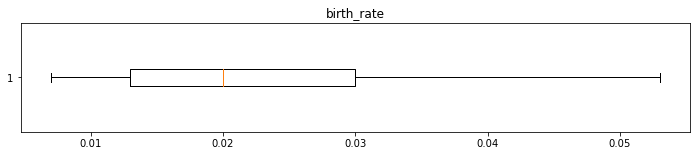

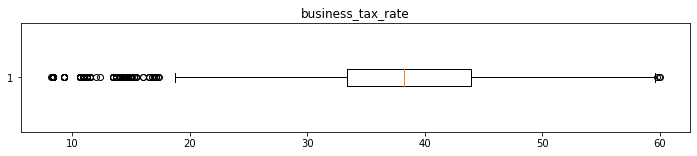

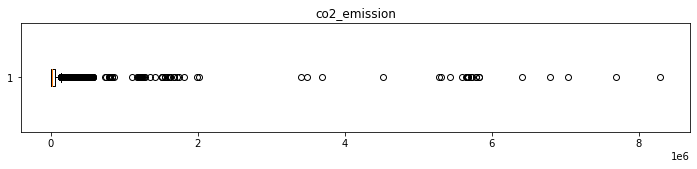

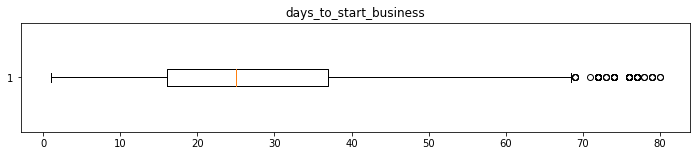

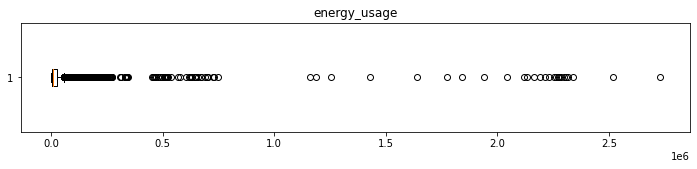

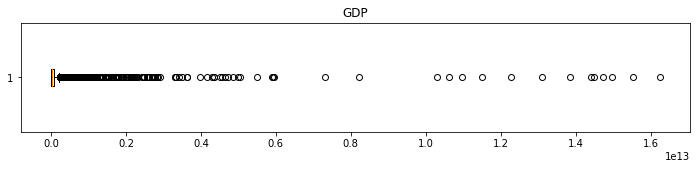

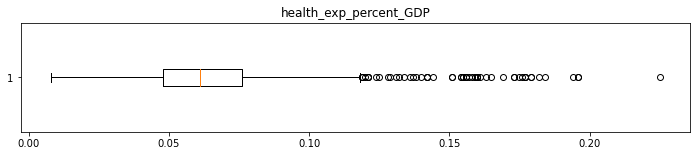

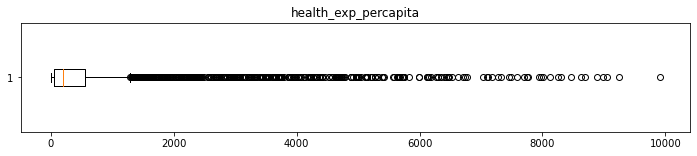

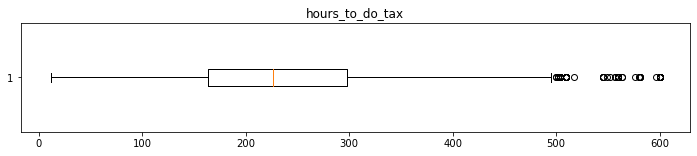

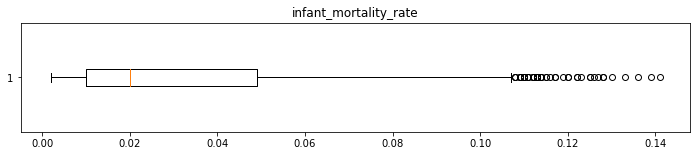

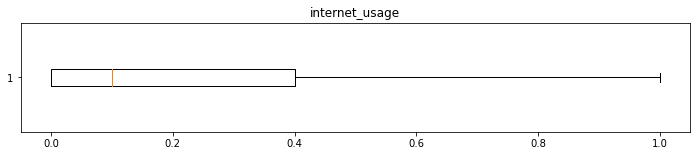

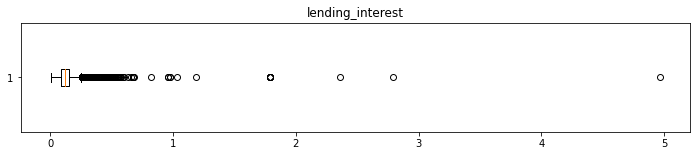

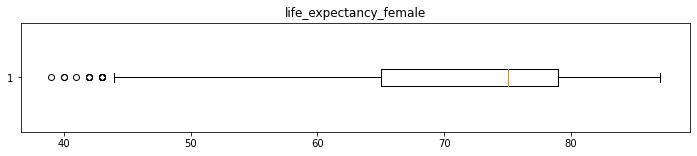

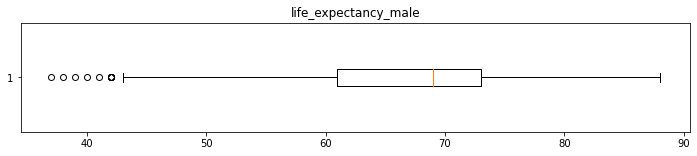

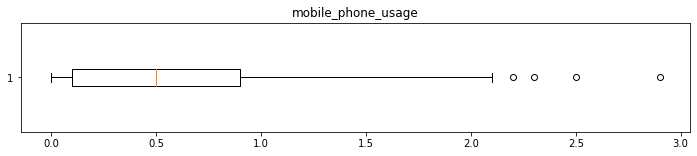

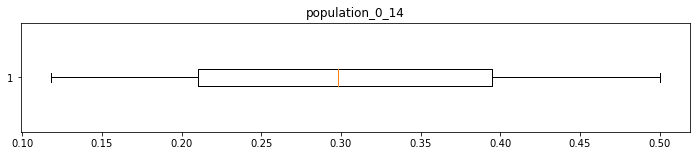

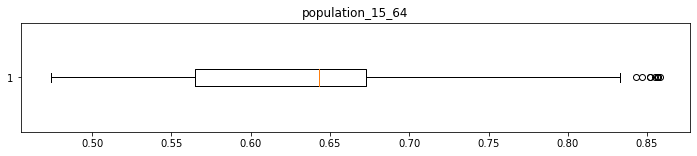

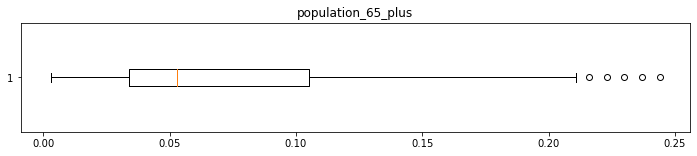

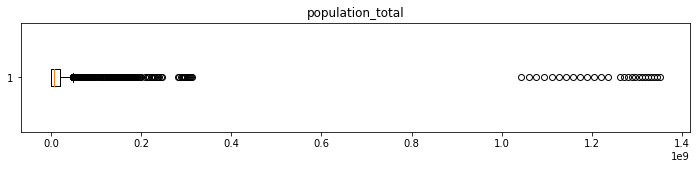

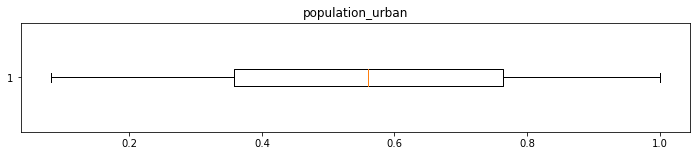

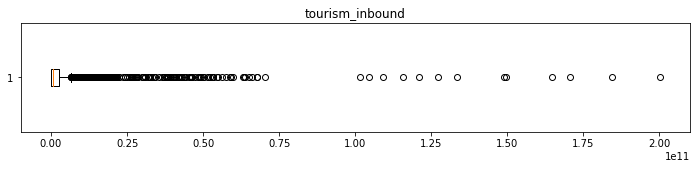

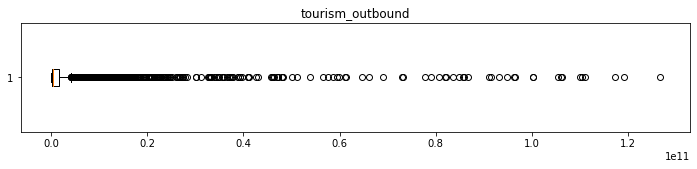

In [42]:
features = gdevelopment_final_data.drop(columns="country",axis=1)
for i in features:
    plt.figure(figsize=(12,2))
    plt.boxplot(gdevelopment_final_data[i].dropna(),vert=False,)
    plt.title(i)
    plt.show()

In [43]:
# Data Transformtions
gdevelopment_final_data['lending_interest'] = np.log(gdevelopment_final_data['lending_interest'])
gdevelopment_final_data[['GDP', 'co2_emission', 'population_total', 'energy_usage', 'tourism_inbound', 'tourism_outbound']] = np.sqrt(gdevelopment_final_data[['GDP', 'co2_emission', 'population_total', 'energy_usage', 'tourism_inbound', 'tourism_outbound']])

In [44]:
features_1 = gdevelopment_final_data.drop(columns="country",axis=1)

In [45]:
#Calculating the Hopkins statistic 
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

#Function to calculate Hopkins test score
def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
        
    return H

In [46]:
features_1.columns

Index(['birth_rate', 'business_tax_rate', 'co2_emission',
       'days_to_start_business', 'energy_usage', 'GDP',
       'health_exp_percent_GDP', 'health_exp_percapita', 'hours_to_do_tax',
       'infant_mortality_rate', 'internet_usage', 'lending_interest',
       'life_expectancy_female', 'life_expectancy_male', 'mobile_phone_usage',
       'population_0_14', 'population_15_64', 'population_65_plus',
       'population_total', 'population_urban', 'tourism_inbound',
       'tourism_outbound'],
      dtype='object')

In [47]:
hopkins(features_1)

0.97117418948815

# Standardization

In [48]:
# Scaling on| numerical features
scaler = MinMaxScaler() # instantiate scaler
scaled_info = scaler.fit_transform(features_1)# fit and transform numerical data of given dataset
scaled_df = pd.DataFrame(scaled_info, columns = features_1.columns) # convert to dataframe
scaled_df.head()

,birth_rate,business_tax_rate,co2_emission,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,infant_mortality_rate,...,life_expectancy_female,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound
0,0.282609,0.579151,0.102184,0.303797,0.097942,0.056216,0.124424,0.005855,0.746599,0.230216,...,0.666667,0.588235,0.000000,0.586387,0.377604,0.149378,0.150067,0.563181,0.020746,0.037839
1,0.934783,0.847490,0.033044,0.832911,0.050807,0.021779,0.119816,0.002019,0.448554,0.906475,...,0.166667,0.137255,0.000000,0.937173,0.065104,0.091286,0.098164,0.263617,0.011186,0.032747
2,0.782609,0.579151,0.013062,0.372152,0.025293,0.010100,0.161290,0.001312,0.438776,0.633094,...,0.375000,0.313725,0.000000,0.879581,0.111979,0.107884,0.068246,0.327887,0.017780,0.018642
3,0.434783,0.203185,0.021817,0.789873,0.024273,0.016939,0.179724,0.015142,0.225340,0.374101,...,0.270833,0.235294,0.034483,0.693717,0.294271,0.107884,0.032433,0.490196,0.031871,0.039428
4,0.847826,0.719836,0.010298,0.293671,0.056800,0.010728,0.198157,0.001009,0.438776,0.676259,...,0.270833,0.235294,0.000000,0.916230,0.080729,0.103734,0.089300,0.104575,0.008868,0.014156


# K-Means Clustering

In [49]:
gdevelopment1=gdevelopment_final_data.copy()

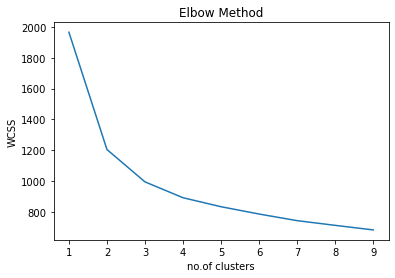

In [50]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,10):
    k = KMeans(n_clusters=i).fit(scaled_info)
    WCSS.append(k.inertia_)
plt.plot(range(1,10),WCSS)
plt.title('Elbow Method')
plt.xlabel('no.of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal Number of Clusters is  3


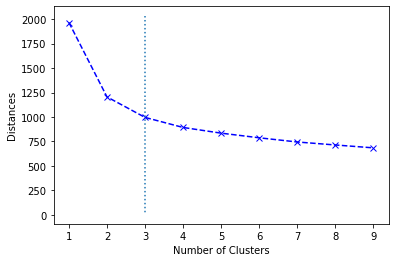

In [51]:
## Getting Optimal K value
from kneed import KneeLocator

y = WCSS
x = range(1, len(y)+1)

kn = KneeLocator(x, y, curve= 'convex', direction='decreasing')
print("Optimal Number of Clusters is ", kn.knee)

plt.plot(x, y, 'bx--')
plt.xlabel('Number of Clusters')
plt.ylabel('Distances')
plt.vlines(kn.knee, plt.ylim()[1], plt.xlim()[1], linestyles='dotted')
plt.show()

In [52]:
model1=KMeans(n_clusters=3, random_state=5, init='k-means++', n_init=15,
               max_iter=500,)
cluster_numbers=model1.fit_predict(scaled_info)

In [53]:
gdevelopment1['Kmeans_Cluster_tag']=cluster_numbers

In [54]:
gdevelopment1['Kmeans_Cluster_tag'].value_counts()

2    1243
1     849
0     612
Name: Kmeans_Cluster_tag, dtype: int64

In [55]:
# silhouette score
sil_score_kmeans= silhouette_score(scaled_info, model1.labels_)
print('silhouette score: ',sil_score_kmeans)

silhouette score:  0.2507177077985873


In [56]:
gdevelopment1.groupby('Kmeans_Cluster_tag').mean().round(1).reset_index()

,Kmeans_Cluster_tag,birth_rate,business_tax_rate,co2_emission,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,...,life_expectancy_female,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound
0,0,0.0,38.1,398.1,18.0,265.7,658106.6,0.1,2495.2,197.3,...,81.0,75.3,1.1,0.2,0.7,0.1,4240.5,0.8,99480.4,95268.0
1,1,0.0,37.6,74.3,34.6,86.6,98495.1,0.1,68.1,259.3,...,58.4,55.8,0.2,0.4,0.5,0.0,3615.5,0.3,13090.7,13473.2
2,2,0.0,37.7,184.2,28.3,126.3,188420.5,0.1,315.3,248.9,...,75.5,69.8,0.6,0.3,0.7,0.1,3136.8,0.6,34190.6,27051.6


# PCA

In [57]:
from sklearn.decomposition import PCA
pca = PCA()
pca_values = pca.fit_transform(scaled_df)
variance = pca.explained_variance_ratio_ # it gives importance of each and every PCA
variance

array([5.35002378e-01, 9.23768431e-02, 7.79957151e-02, 5.37886958e-02,
       5.14224164e-02, 4.38337501e-02, 3.48239007e-02, 2.97654607e-02,
       2.47449599e-02, 1.24355885e-02, 1.03213725e-02, 7.18624512e-03,
       6.26857067e-03, 5.26167915e-03, 4.76413219e-03, 4.19990098e-03,
       2.36642027e-03, 1.75937815e-03, 7.90791646e-04, 6.66320410e-04,
       2.18581065e-04, 6.89906806e-06])

In [58]:
var_cumulative = np.cumsum(np.round(variance, decimals= 3)*100)
var_cumulative

array([53.5, 62.7, 70.5, 75.9, 81. , 85.4, 88.9, 91.9, 94.4, 95.6, 96.6,
       97.3, 97.9, 98.4, 98.9, 99.3, 99.5, 99.7, 99.8, 99.9, 99.9, 99.9])

In [59]:
# PCA for 3 components
pca = PCA(n_components=3)
pca_values = pca.fit_transform(scaled_df)
variance = pca.explained_variance_ratio_
variance

array([0.53500238, 0.09237684, 0.07799572])

In [60]:
var_cumulative = np.cumsum(np.round(variance, decimals= 3)*100)
var_cumulative

array([53.5, 62.7, 70.5])

In [61]:
## Creating Dataframe for top 7 PCA values
# pca_df = pd.DataFrame(pca_values ,columns=["PCA1","PCA2","PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9"])
pca_df = pd.DataFrame(pca_values ,columns=["PCA1","PCA2","PCA3"])
pca_df.head(10)

,PCA1,PCA2,PCA3
0,-0.212748,0.068761,-0.283411
1,-1.335831,0.324920,0.031405
2,-0.948457,0.059883,0.173805
3,-0.662071,-0.202518,-0.028415
4,-1.117956,0.186132,0.238022
5,-1.152108,0.181351,0.347777
6,-0.948695,0.172546,0.152896
7,-1.064019,0.396625,0.023756
8,-1.308984,0.164331,0.151709
9,-0.788800,-0.116783,0.237444


# K-means clustering using PCA values

In [62]:
gdevelopment2=gdevelopment_final_data.copy()

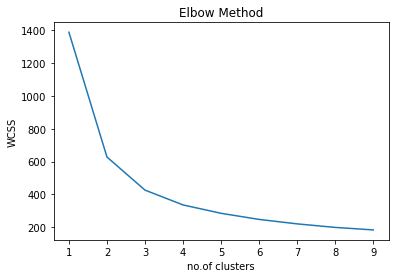

In [63]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,10):
    k = KMeans(n_clusters=i, init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=5).fit(pca_values)
    WCSS.append(k.inertia_)
plt.plot(range(1,10),WCSS)
plt.title('Elbow Method')
plt.xlabel('no.of clusters')
plt.ylabel('WCSS')
plt.show() 

No. of Optimal Clusters is  3


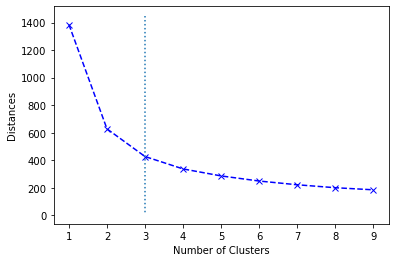

In [64]:
## Getting Optimal K value
from kneed import KneeLocator

y = WCSS
x = range(1, len(y)+1)

kn = KneeLocator(x, y, curve= 'convex', direction='decreasing')
print("No. of Optimal Clusters is ", kn.knee)

plt.plot(x, y, 'bx--')
plt.xlabel('Number of Clusters')
plt.ylabel('Distances')
plt.vlines(kn.knee, plt.ylim()[1], plt.xlim()[1], linestyles='dotted')
plt.show()

In [65]:
kmeans_model=KMeans(n_clusters=3, init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=5)
cluster_numbers = kmeans_model.fit_predict(pca_values)

In [66]:
data_after_imputation['Cluster']=cluster_numbers

In [67]:
data_after_imputation['Cluster'].value_counts()

0    1278
1     882
2     544
Name: Cluster, dtype: int64

In [68]:
# silhouette score
sil_score_kmeans= silhouette_score(pca_values, kmeans_model.labels_)
print('silhouette score: ',sil_score_kmeans)

silhouette score:  0.4102134055457049


In [69]:
data_after_imputation.groupby('Cluster').mean().round(1).reset_index()

,Cluster,birth_rate,business_tax_rate,co2_emission,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,...,life_expectancy_female,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound
0,0,0.0,37.7,80016.4,28.3,32096.6,7.366634e+10,0.1,371.2,248.9,...,75.8,70.0,0.6,0.3,0.7,0.1,25112084.4,0.6,1.921375e+09,1.247006e+09
1,1,0.0,37.6,26855.3,34.5,16229.9,2.425883e+10,0.1,70.4,258.2,...,58.9,56.2,0.2,0.4,0.5,0.0,29642880.6,0.3,3.658833e+08,3.783924e+08
2,2,0.0,38.1,428660.8,16.3,171377.3,1.002712e+12,0.1,2647.5,191.9,...,81.3,75.6,1.1,0.2,0.7,0.1,49305621.7,0.8,1.648578e+10,1.626841e+10


In [70]:
cluster_df =data_after_imputation.copy()
cluster_df

,birth_rate,business_tax_rate,co2_emission,country,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,...,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound,Cluster
0,0.020,38.2000,8.793100e+04,Algeria,25.0,2.699800e+04,5.479006e+10,0.035,60.0,451.00,...,67.0,0.000000,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08,0
1,0.050,52.1000,9.542000e+03,Angola,66.8,7.499000e+03,9.129595e+09,0.034,22.0,275.75,...,44.0,0.000000,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08,1
2,0.043,38.2000,1.617000e+03,Benin,30.4,1.983000e+03,2.359122e+09,0.043,15.0,270.00,...,53.0,0.000000,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07,1
3,0.027,18.7250,4.276000e+03,Botswana,63.4,1.836000e+03,5.788312e+09,0.047,152.0,144.50,...,49.0,0.100000,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08,1
4,0.046,45.4875,1.041000e+03,Burkina Faso,24.2,9.308000e+03,2.610959e+09,0.051,12.0,270.00,...,49.0,0.000000,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,38.2000,1.124545e+02,Turks and Caicos Islands,25.0,9.308000e+03,1.443393e+10,0.061,191.0,226.00,...,69.0,0.500000,0.298,0.643,0.053,32427,0.911,2.960000e+08,3.940000e+08,0
2700,0.013,46.4000,5.657526e+06,United States,5.0,2.132446e+06,1.624460e+13,0.179,8895.0,175.00,...,76.0,1.000000,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11,2
2701,0.015,41.9000,6.046818e+03,Uruguay,7.0,3.328083e+03,5.000435e+10,0.089,1308.0,310.00,...,74.0,1.500000,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09,2
2702,0.020,52.2200,1.801557e+05,"Venezuela, RB",25.0,6.326858e+04,3.812862e+11,0.046,593.0,226.00,...,72.0,1.000000,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09,0


In [71]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

,birth_rate,business_tax_rate,co2_emission,country,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,...,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound,Cluster
0,0.020,38.2000,87931.000000,Algeria,25.000000,26998.000000,5.479006e+10,0.035,60.0,451.0,...,67.000000,0.000000,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08,0
26,0.022,31.6000,47114.000000,Libya,35.000000,15901.000000,3.389660e+10,0.034,252.0,226.0,...,70.000000,0.000000,0.333,0.628,0.039,5176185,0.763,8.400000e+07,4.950000e+08,0
31,0.017,26.3250,2769.000000,Mauritius,19.444444,1115.750000,4.582562e+09,0.037,146.0,161.0,...,68.000000,0.200000,0.258,0.681,0.061,1186873,0.427,7.320000e+08,2.030000e+08,0
32,0.022,49.8500,33905.000000,Morocco,14.400000,10238.000000,3.702061e+10,0.042,54.0,328.0,...,67.000000,0.100000,0.341,0.613,0.047,28710123,0.533,2.280000e+09,5.060000e+08,0
40,0.019,42.2375,565.000000,Seychelles,39.000000,233.000000,6.148780e+08,0.048,371.0,76.0,...,68.181818,0.300000,0.282,0.637,0.081,81131,0.501,2.250000e+08,4.400000e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,0.018,27.9000,2339.636364,Suriname,25.000000,697.000000,5.012121e+09,0.059,521.0,199.0,...,68.000000,1.100000,0.278,0.656,0.066,534541,0.662,7.900000e+07,5.800000e+07,0
2698,0.015,29.1000,34882.909091,Trinidad and Tobago,41.000000,16811.333333,2.343634e+10,0.054,972.0,210.0,...,66.000000,1.400000,0.207,0.705,0.088,1337439,0.088,5.212500e+08,1.596667e+08,0
2699,0.020,38.2000,112.454545,Turks and Caicos Islands,25.000000,9308.000000,1.443393e+10,0.061,191.0,226.0,...,69.000000,0.500000,0.298,0.643,0.053,32427,0.911,2.960000e+08,3.940000e+08,0
2702,0.020,52.2200,180155.727273,"Venezuela, RB",25.000000,63268.583333,3.812862e+11,0.046,593.0,226.0,...,72.000000,1.000000,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09,0


In [72]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,birth_rate,business_tax_rate,co2_emission,country,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,...,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound,Cluster
1,0.050,52.1000,9542.000000,Angola,66.8,7499.000000,9.129595e+09,0.034,22.0,275.750,...,44.0,0.0,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08,1
2,0.043,38.2000,1617.000000,Benin,30.4,1983.000000,2.359122e+09,0.043,15.0,270.000,...,53.0,0.0,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07,1
3,0.027,18.7250,4276.000000,Botswana,63.4,1836.000000,5.788312e+09,0.047,152.0,144.500,...,49.0,0.1,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08,1
4,0.046,45.4875,1041.000000,Burkina Faso,24.2,9308.000000,2.610959e+09,0.051,12.0,270.000,...,49.0,0.0,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07,1
5,0.042,51.6000,301.000000,Burundi,12.5,9308.000000,8.704861e+08,0.063,7.0,182.375,...,47.0,0.0,0.490,0.481,0.029,6674286,0.082,1.400000e+06,1.400000e+07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,0.036,11.0000,177.111111,Timor-Leste,25.0,59.000000,1.355000e+09,0.043,50.0,276.000,...,66.0,0.6,0.463,0.505,0.032,1148958,0.308,2.100000e+07,8.000000e+07,1
2643,0.031,32.7000,19319.090909,"Yemen, Rep.",40.0,6517.833333,3.199280e+10,0.055,71.0,248.000,...,62.0,0.6,0.407,0.565,0.028,23852409,0.329,1.057000e+09,2.036667e+08,1
2654,0.029,42.1000,3812.363636,Papua New Guinea,53.0,9308.000000,1.565392e+10,0.052,114.0,207.000,...,60.0,0.4,0.384,0.588,0.029,7167010,0.130,4.725000e+06,7.254545e+07,1
2656,0.031,25.3000,184.090909,Solomon Islands,9.0,59.750000,9.999724e+08,0.080,148.0,80.000,...,66.0,0.6,0.404,0.563,0.033,549598,0.210,6.690000e+07,6.800000e+07,1


In [73]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

,birth_rate,business_tax_rate,co2_emission,country,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,...,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound,Cluster
62,0.008,23.5500,4.046500e+04,"Hong Kong SAR, China",8.4,1.339200e+04,1.716682e+11,0.061,191.0,79.75,...,78.0,0.8,0.173,0.717,0.110,6665000,1.000,8.198000e+09,1.250200e+10,2
65,0.009,51.6500,1.219589e+06,Japan,24.6,5.189640e+05,4.731199e+12,0.076,2834.0,342.50,...,78.0,0.5,0.146,0.682,0.172,126870000,0.786,5.970000e+09,4.264300e+10,2
68,0.013,30.8375,4.475610e+05,"Korea, Rep.",14.2,1.881610e+05,5.616330e+11,0.043,491.0,256.50,...,72.0,0.6,0.210,0.717,0.073,47008111,0.796,8.527000e+09,7.945000e+09,2
79,0.012,26.3125,4.900600e+04,Singapore,4.9,1.869200e+04,9.583597e+10,0.027,662.0,82.25,...,76.0,0.7,0.215,0.712,0.073,4027900,1.000,5.142000e+09,4.535000e+09,2
89,0.010,53.3375,6.369600e+04,Austria,25.0,2.855800e+04,1.920707e+11,0.100,2403.0,170.00,...,75.0,0.8,0.170,0.675,0.155,8011566,0.658,1.138200e+10,7.001000e+09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,0.014,27.7000,6.272391e+04,Chile,8.0,3.272000e+04,2.662593e+11,0.072,1103.0,291.00,...,77.0,1.4,0.214,0.689,0.097,17464814,0.890,3.180000e+09,2.348000e+09,2
2686,0.019,52.5000,4.252716e+05,Mexico,6.0,1.919240e+05,1.186461e+12,0.061,618.0,337.00,...,75.0,0.8,0.290,0.647,0.063,120847477,0.784,1.332000e+10,1.073500e+10,2
2691,0.011,50.7000,8.196000e+03,Puerto Rico,6.0,9.308000e+03,1.010807e+11,0.061,191.0,218.00,...,75.0,0.8,0.198,0.667,0.135,3651545,0.937,3.193000e+09,1.156000e+09,2
2700,0.013,46.4000,5.657526e+06,United States,5.0,2.132446e+06,1.624460e+13,0.179,8895.0,175.00,...,76.0,1.0,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11,2


Saving kmeans model

In [74]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [75]:
cluster_df.to_csv("Clustered_ World_Development_Data.csv")

In [88]:
cluster_df

,birth_rate,business_tax_rate,co2_emission,country,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,...,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound,Cluster
0,0.020,38.2000,8.793100e+04,Algeria,25.0,2.699800e+04,5.479006e+10,0.035,60.0,451.00,...,67.0,0.000000,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08,0
1,0.050,52.1000,9.542000e+03,Angola,66.8,7.499000e+03,9.129595e+09,0.034,22.0,275.75,...,44.0,0.000000,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08,1
2,0.043,38.2000,1.617000e+03,Benin,30.4,1.983000e+03,2.359122e+09,0.043,15.0,270.00,...,53.0,0.000000,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07,1
3,0.027,18.7250,4.276000e+03,Botswana,63.4,1.836000e+03,5.788312e+09,0.047,152.0,144.50,...,49.0,0.100000,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08,1
4,0.046,45.4875,1.041000e+03,Burkina Faso,24.2,9.308000e+03,2.610959e+09,0.051,12.0,270.00,...,49.0,0.000000,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,38.2000,1.124545e+02,Turks and Caicos Islands,25.0,9.308000e+03,1.443393e+10,0.061,191.0,226.00,...,69.0,0.500000,0.298,0.643,0.053,32427,0.911,2.960000e+08,3.940000e+08,0
2700,0.013,46.4000,5.657526e+06,United States,5.0,2.132446e+06,1.624460e+13,0.179,8895.0,175.00,...,76.0,1.000000,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11,2
2701,0.015,41.9000,6.046818e+03,Uruguay,7.0,3.328083e+03,5.000435e+10,0.089,1308.0,310.00,...,74.0,1.500000,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09,2
2702,0.020,52.2200,1.801557e+05,"Venezuela, RB",25.0,6.326858e+04,3.812862e+11,0.046,593.0,226.00,...,72.0,1.000000,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09,0


# Training and Testing the model accuracy using Random Forest

In [76]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [77]:
#Split Dataset
X = cluster_df.drop(['Cluster','country'],axis=1)
# X =X[~X.isin([np.nan, np.inf, -np.inf]).any(1)]
# X.replace([np.inf, -np.inf], np.nan, inplace=True)
# new_X = X[np.isfinite(X).all(1)]
y= cluster_df['Cluster']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=5)

In [78]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [79]:
clf=SVC()
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 52.83251231527094


array([[341,   0,  29],
       [275,   0,   5],
       [ 74,   0,  88]], dtype=int64)

In [80]:
clf = SVC(kernel= "poly") 
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred) 

Accuracy = 50.98522167487685


array([[367,   0,   3],
       [280,   0,   0],
       [115,   0,  47]], dtype=int64)

In [81]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.4799220272904484)

In [82]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 45.566502463054185


array([[370,   0,   0],
       [280,   0,   0],
       [162,   0,   0]], dtype=int64)

In [83]:
#Confusion_Matrix
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.metrics as metrics
print("Confusion Matrix")
print("____________________")
print(metrics.confusion_matrix(y_test, y_pred))
print("---------------------------------------------------------")
print("Classification Report")
print("______________________")
print(classification_report(y_test, y_pred))

Confusion Matrix
____________________
[[370   0   0]
 [280   0   0]
 [162   0   0]]
---------------------------------------------------------
Classification Report
______________________
              precision    recall  f1-score   support

           0       0.46      1.00      0.63       370
           1       0.00      0.00      0.00       280
           2       0.00      0.00      0.00       162

    accuracy                           0.46       812
   macro avg       0.15      0.33      0.21       812
weighted avg       0.21      0.46      0.29       812



In [84]:
#Decision_Tree
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=15, max_depth=25, random_state=11)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [85]:
#Confusion_Matrix
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.metrics as metrics
print("Confusion Matrix")
print("____________________")
print(metrics.confusion_matrix(y_test, y_pred))
print("------------------------------------------------------------")
print("Classification Report")
print("______________________")
print(classification_report(y_test, y_pred))

Confusion Matrix
____________________
[[358   5   7]
 [  4 276   0]
 [  8   0 154]]
------------------------------------------------------------
Classification Report
______________________
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       370
           1       0.98      0.99      0.98       280
           2       0.96      0.95      0.95       162

    accuracy                           0.97       812
   macro avg       0.97      0.97      0.97       812
weighted avg       0.97      0.97      0.97       812



# Saving the Random Forest model for future prediction

In [86]:
import pickle
from pickle import dump,load
filename = 'world_model.pkl'
pickle.dump(model, open(filename, 'wb'))# to create a final model.sav file
 

Deploying the model

In [87]:
clust = cluster_1_df.iloc[0:1, ]
clust = clust.append(cluster_2_df.iloc[0:1, ])
clust = clust.append(cluster_3_df.iloc[0:1, ])
clust

,birth_rate,business_tax_rate,co2_emission,country,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,...,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound,Cluster
0,0.020,38.20,87931.0,Algeria,25.0,26998.0,5.479006e+10,0.035,60.0,451.00,...,67.0,0.0,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08,0
1,0.050,52.10,9542.0,Angola,66.8,7499.0,9.129595e+09,0.034,22.0,275.75,...,44.0,0.0,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08,1
62,0.008,23.55,40465.0,"Hong Kong SAR, China",8.4,13392.0,1.716682e+11,0.061,191.0,79.75,...,78.0,0.8,0.173,0.717,0.110,6665000,1.000,8.198000e+09,1.250200e+10,2
